In [9]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

from scipy.stats import randint, uniform, reciprocal

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [35]:
#Decision tree would handle all the dimensionality pretty well
df = pd.read_csv("Customer-numerical_raw.csv")

results = df.pop("Churn")

features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head(20))

X_train, X_test, y_train, y_test = train_test_split(df, results, test_size=0.20, random_state=42)


    SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0               0        1           0 -1.280248             0   
1               0        0           0  0.064303             1   
2               0        0           0 -1.239504             1   
3               0        0           0  0.512486             0   
4               0        0           0 -1.239504             1   
5               0        0           0 -0.995040             1   
6               0        0           1 -0.424625             1   
7               0        0           0 -0.913552             0   
8               0        1           0 -0.180161             1   
9               0        0           1  1.205134             1   
10              0        1           1 -0.791321             1   
11              0        0           0 -0.669089             1   
12              0        1           0  1.042158             1   
13              0        0           0  0.675462             1   
14        

In [11]:
#Decision tree prediction model
#Finding best params

param_grid = {
    'max_depth': [5, 6, 7 ,8 ,9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid.fit(X_train, y_train)

best_dt = grid.best_estimator_

print("Best Decision Tree Model: ", best_dt)

# #test 1 using f1
# best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,random_state=42)
# # Accuracy: 0.7739872068230277
# # F1-score: 0.7756494893324082

# #test 2 using accuracy
# #best_dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)
# # Accuracy: 0.7732764747690121
# # F1-score: 0.7725883751066696


Best Decision Tree Model:  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)


In [12]:
#Training the model

best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,random_state=42)

best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7739872068230277
F1-score: 0.7756494893324082


In [ ]:
#Random forest prediction model
#Finding best params

param_distributions = {
    'n_estimators': randint(50, 200),  # Randomly sample between 50 and 200
    'max_depth': [10,20,30,40,50], # None or random integer between 10 and 50
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)

n_iter = 100  # Number of random combinations to try (adjust this)
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=n_iter, cv=5, scoring='f1', n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(best_rf)

#Test 1
#best_rf = RandomForestClassifier(class_weight='balanced', max_depth=np.int64(39),
#          max_features='log2', min_samples_leaf=4,min_samples_split=3, n_estimators=148, random_state=42)
# Accuracy: 0.7540867093105899
# F1-score: 0.7635032080257796

#test 2 
# RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
#                        max_features='log2', min_samples_leaf=4,
#                        min_samples_split=8, n_estimators=62, random_state=42)
# Accuracy: 0.7491115849324804
# F1-score: 0.760556945261212

#test 3
# RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
#                        max_depth=10, max_features='log2', min_samples_leaf=3,
#                        min_samples_split=4, n_estimators=171, random_state=42)
# Accuracy: 0.7469793887704336
# F1-score: 0.7582071482471747

#test 4
# RandomForestClassifier(class_weight='balanced', max_depth=10,
#                        min_samples_leaf=3, min_samples_split=7, n_estimators=95,
#                        random_state=42)
# Accuracy: 0.7533759772565742
# F1-score: 0.7639969459369599


Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=7, n_estimators=95,
                       random_state=42)


In [161]:
#Training the model
best_rf = RandomForestClassifier(class_weight='balanced', max_depth=np.int64(39),
          max_features='log2', min_samples_leaf=4,min_samples_split=3, n_estimators=148, random_state=42)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7547974413646056
F1-score: 0.7641317180460944


In [ ]:
#Support vector machine model
#Finding best params

param_distributions = {
    'C': reciprocal(1, 100),  # Reduced range for C (1 to 100) - MOST IMPORTANT
    'kernel': ['rbf'],  # Focus on rbf kernel initially - VERY IMPORTANT
    'gamma': ['scale', 'auto'] + list(reciprocal(0.001, 0.1).rvs(5)),  # Reduced range and fewer samples for gamma - IMPORTANT
    'class_weight': [None, 'balanced']  # Keep class_weight, but it's less computationally intensive
}
svc = SVC(random_state=42)

n_iter = 100  
random_search = RandomizedSearchCV(svc, param_distributions, n_iter=n_iter, cv=5, scoring='f1', n_jobs=-1, verbose=1)  # Use F1-score for classification
random_search.fit(X_train, y_train)

best_svc = random_search.best_estimator_
print(best_svc)

#test 1
#best_svc = SVC(C=np.float64(1.309057363357464), class_weight='balanced',
#     gamma=np.float64(0.023141125053224965), random_state=42)
# Accuracy: 0.7334754797441365
# Best F1-score: 0.6275991221199372

#test 2
#best_svc = SVC(C=np.float64(1.1332667250594013), class_weight='balanced', random_state=42)
# Accuracy: 0.7327647476901208
# Best F1-score: 0.6266565410903586

#test 3
#best_svc = SVC(C=np.float64(1.318174530710419), class_weight='balanced', random_state=42)
#Accuracy: 0.7356076759061834
#Best F1-score: 0.7491993297100363

Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVC(C=np.float64(1.318174530710419), class_weight='balanced', random_state=42)


In [163]:
#Training the model
best_svc = SVC(C=np.float64(1.318174530710419), class_weight='balanced', random_state=42)

best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)

print("Best SVC Model: ", best_svc)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best F1-score:", f1_score(y_test, y_pred, average='weighted'))

Best SVC Model:  SVC(C=np.float64(1.318174530710419), class_weight='balanced', random_state=42)
Accuracy: 0.7356076759061834
Best F1-score: 0.7491993297100363


In [165]:
#Gradient boosting classifier model
#Finding best params

param_distributions = {
    'n_estimators': randint(50, 300),  # Number of boosting stages (trees)
    'learning_rate': uniform(0.01, 0.3),  # Contribution of each tree
    'max_depth': randint(3, 10),  # Maximum depth of the individual trees
    'min_samples_split': randint(2, 20),  # Minimum samples to split a node
    'min_samples_leaf': randint(1, 10),  # Minimum samples in a leaf
    'subsample': uniform(0.6, 1.0),  # Fraction of samples used for fitting the trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for splits
    'criterion': ['friedman_mse', 'squared_error'], # Function to measure the quality of a split.
}

gb_clf = GradientBoostingClassifier(random_state=42)

n_iter = 100 
random_search = RandomizedSearchCV(gb_clf, param_distributions, n_iter=n_iter, cv=5, scoring='f1', n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)

best_gb_clf = random_search.best_estimator_
print(best_gb_clf)

#test 1
# Best Gradient Boosting Classifier: GradientBoostingClassifier(criterion='squared_error',
#                            learning_rate=np.float64(0.03307275938883212),
#                            max_depth=4, min_samples_leaf=2, min_samples_split=3,
#                            n_estimators=195, random_state=42,
#                            subsample=np.float64(0.9823357224951418))
# Best F1-score: 0.5972449377862121

#test 2
# Best Gradient Boosting Classifier: 
# GradientBoostingClassifier(learning_rate=np.float64(0.047628255111097854),
#                            max_depth=4, max_features='log2', min_samples_leaf=9,
#                            n_estimators=156, random_state=42,
#                            subsample=np.float64(0.6836865782688305))
# Best F1-score: 0.5982972141243003

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Linos\Documents\Coding_practice\Dirbtinis Intelektas ir Python\Telecommunications_bussiness_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
280 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Linos\Documents\Coding_practice\Dirbtinis Intelektas ir Python\Telecommunications_bussiness_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Linos\Documents\Coding_practice\Dirbtinis Intelektas ir Python\Telecommunications_bussiness_analysis\.venv\Lib

GradientBoostingClassifier(learning_rate=np.float64(0.09433390791067263),
                           max_depth=5, max_features='log2', min_samples_leaf=4,
                           min_samples_split=12, n_estimators=64,
                           random_state=42,
                           subsample=np.float64(0.638495604061242))


In [166]:
#Training the model
best_gb_clf = GradientBoostingClassifier(learning_rate=np.float64(0.047628255111097854),
                           max_depth=4, max_features='log2', min_samples_leaf=9,
                           n_estimators=156, random_state=42,
                           subsample=np.float64(0.6836865782688305))

best_gb_clf.fit(X_train, y_train)
y_pred = best_gb_clf.predict(X_test)

print("Best Gradient Boosting Classifier:", best_gb_clf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best F1-score:", f1_score(y_test, y_pred, average='weighted'))

Best Gradient Boosting Classifier: GradientBoostingClassifier(learning_rate=np.float64(0.047628255111097854),
                           max_depth=4, max_features='log2', min_samples_leaf=9,
                           n_estimators=156, random_state=42,
                           subsample=np.float64(0.6836865782688305))
Accuracy: 0.7867803837953091
Best F1-score: 0.7785059297350782


In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [168]:
model = Sequential()

width = X_train.shape[1]

model.add(Input(shape=(width,)))  #gonna give the same amount of inputs as parameters. Why tuple?

# #first hidden layer
# model.add(Dense(units=4, activation="relu"))

# model.add(Dense(units=8, activation="relu"))
# model.add(Dropout(rate=0.3))

#second hidden layer
model.add(Dense(units=8, activation="relu")) #try 16 or 32
model.add(Dropout(rate=0.2))

# model.add(Dense(units=4, activation="relu"))

#final output layer
model.add(Dense(units=1, activation="sigmoid"))  # 1 with sigmoid should lean towards 0 or 1 just the binary classification we want


In [169]:
# Hyperparameters
learning_rate = 0.0003
batch_size = 64 #try 32 and 128
epochs = 100
validation_split = 0.1

In [170]:
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer = optimizer,
    loss = 'binary_crossentropy', #as we want a binary output
    metrics = ["accuracy"])

In [171]:
training = model.fit(
    X_train,
    y_train,
    epochs = epochs, #experiment 200 was much, graph showed 25 could be ideal
    validation_split=validation_split,
    batch_size = batch_size,
    verbose = 1
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5410 - loss: 0.7364 - val_accuracy: 0.6607 - val_loss: 0.6026
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.6023 - val_accuracy: 0.7407 - val_loss: 0.5167
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5367 - val_accuracy: 0.7762 - val_loss: 0.4720
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7564 - loss: 0.5059 - val_accuracy: 0.7957 - val_loss: 0.4480
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4810 - val_accuracy: 0.8153 - val_loss: 0.4333
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.4782 - val_accuracy: 0.8206 - val_loss: 0.4234
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.4622 - val_accuracy: 0.8224 - val_loss: 0.4161
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777 - loss: 0.4639 - val_accuracy: 0.8242 - v

In [172]:
import matplotlib.pyplot as plt

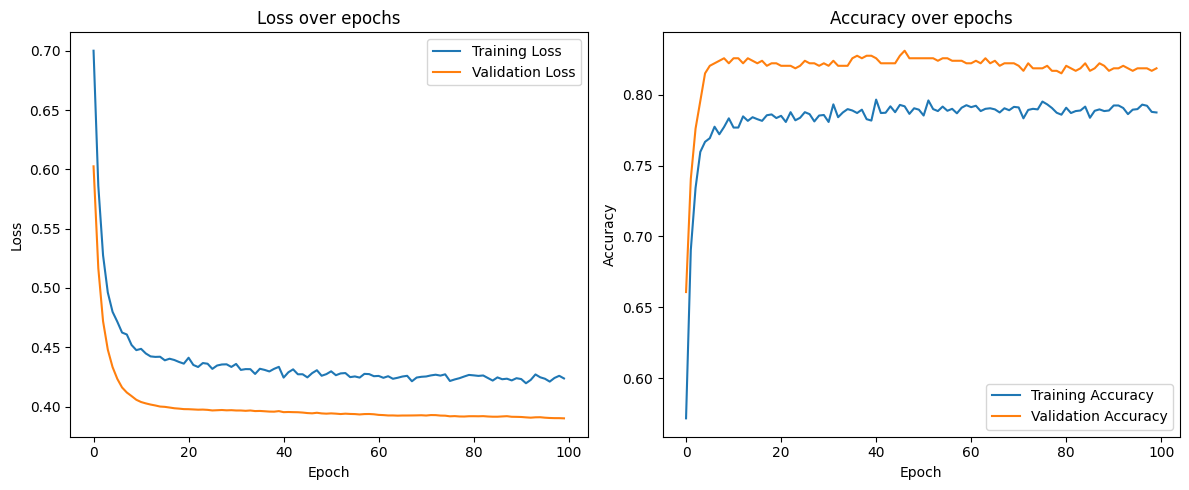

In [173]:
def plot_training_history(history):
    """
    Plots the training loss and accuracy curves from a Keras History object.

    Args:
        history: The History object returned by model.fit().
    """
    # --- Plot Training & Validation Loss ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history: # Check if validation loss is available
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # --- Plot Training & Validation Accuracy ---
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history: # Check if validation accuracy is available
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

plot_training_history(training)

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [175]:
#evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

y_pred_probabilities = model.predict(X_test) # Get probability outputs
y_pred = (y_pred_probabilities > 0.5).astype(int) # Convert probabilities to class labels (integer class indices)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (Raw Counts):")
print(confusion_matrix(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4319
Loss:  0.43712785840034485
Accuracy:  0.7825160026550293
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix (Raw Counts):
[[917 116]
 [190 184]]


In [176]:
# EXPERIMENT with:
#     - Using a wider and narrower sets
#     - Number of hidden layers
#     - Number of neurons per hidden layer
#     - Activation functions (ReLU, LeakyReLU, tanh, sigmoid - for hidden layers)
#     - Optimizer (adam, sgd, rmsprop, etc.)
#     - Learning rate (for the optimizer)
#     - Batch size
#     - Number of epochs
#     - Regularization techniques (Dropout, L1/L2 regularization if overfitting)
#     - Different preprocessing methods (imputation, scaling, feature engineering)